In [40]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [43]:
df = pd.read_csv('surrounding.csv')

# df = df.iloc[:-7,:]

sinα = np.sin(df[' angle motors / °'] * np.pi/180)
cosα = np.cos(df[' angle motors / °'] * np.pi/180)

def func(x, a, b):
    return a*(np.exp(b*x) - 1)

# dist_in = df[' distance infrared / %'] / 100 * 1000 + 65
dist_in = func(df[' distance infrared / %'].to_numpy(), *[5.25744841e+02, 1.48802736e-02])


df['xu'] = (df[' distance ultrasonic / mm'] + 65) * sinα + 40 * cosα
df['yu'] = (df[' distance ultrasonic / mm'] + 65) * cosα - 40 * sinα

df['xi'] = dist_in * sinα - 40 * cosα
df['yi'] = dist_in * cosα + 40 * sinα


df['ru'] = np.sqrt(df['xu'].pow(2) + df['yu'].pow(2))
df['ri'] = np.sqrt(df['xi'].pow(2) + df['yi'].pow(2))

condu = (df['ru'].to_numpy() > df['ri'].to_numpy()) | (df['ri'].to_numpy() > 900)

df['xc'] = condu * df['xu'] + ~ condu * df['xi']
df['yc'] = condu * df['yu'] + ~ condu * df['yi']

# df

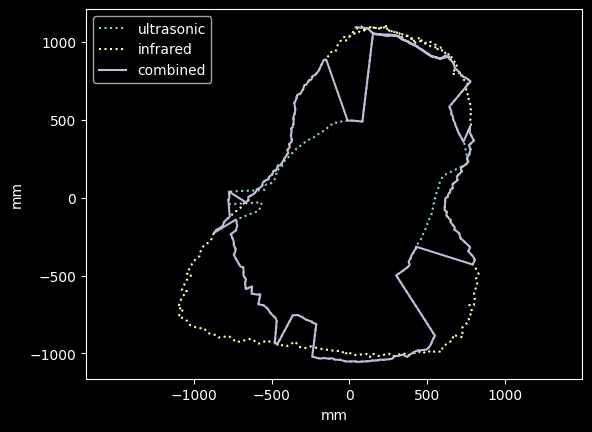

In [45]:
plt.plot(df['xu'], df['yu'], ':', label = 'ultrasonic' )
plt.plot(df['xi'], df['yi'], ':', label = 'infrared' )
plt.plot(df['xc'], df['yc'],      label = 'combined' )
plt.legend(loc = 'upper left')
plt.axis('equal')
plt.xlabel('mm')
plt.ylabel('mm')
plt.xticks(range(-1000,1001,500))
plt.yticks(range(-1000,1001,500))

plt.show()
# plt.savefig('surrounding.png', transparent=True)